# Section 1 : Submitter

**Submitter:
Eden Fabrikant**

Kaggle Link: https://www.kaggle.com/edenfabrikant

# Section 2 : Overview

**House Prices Advanced Regression Techniques Competition - Project Overview**

In this Kaggle competition, we aim to predict the final sale price of homes located in Ames, Iowa, based on a diverse set of features.

As some people may put an emphasis on the number of rooms in the house, neighborhood or even the age of the house as the main predictor of the home price, we try to give more accurate predictions (SalePrice column) with many more features. In this competition we explore this feature with a given Dataset and utilize it for our model - minimizing the RMSE metric.

We will use a **LWLR, KNN and Decision tree model** to perform this prediction. Our workflow includes data exploration, processing of the data, statistical analyses, training the model, and evaluating its performance.  

# Section 3 : Imports and Definitions

In [ ]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, accuracy_score,  precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import log_loss, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from scipy.stats import randint
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
import plotly.graph_objects as go
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from joblib import Parallel, delayed
from sklearn.utils import shuffle

# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

# Section 4 : Mount to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to the new folder inside my google drive
folder_path = '/content/drive/My Drive/Ames ML'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Section 5 : Data Investigation and Preprocessing

In [ ]:
#uploading the data
train_path = '/content/drive/My Drive/Ames ML/train.csv'
test_path = '/content/drive/My Drive/Ames ML/test.csv'

train_df = pd.read_csv(train_path)
train_df_f = pd.read_csv(train_path)
test_df_f = pd.read_csv(test_path)

In [ ]:
#display
print("Train display:")
display(train_df)
print("Test display:")
display(test_df_f)

Train display:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Test display:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Unique value count

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

unique_counts = train_df.nunique().sort_values(ascending=False).head(20)
display(unique_counts.to_frame(name='Unique Values'))

,Unique Values
Id,1460
LotArea,1073
GrLivArea,861
BsmtUnfSF,780
1stFlrSF,753
TotalBsmtSF,721
SalePrice,663
BsmtFinSF1,637
GarageArea,441
2ndFlrSF,417


We will keep in mind that LotArea, GrLivArea, BsmtUnfSF, 1stFlrSF, TotalBsmtSF (and Id of cource) will cause overfitting.

Searching for missing data

In [ ]:
# Show only the columns that actually have NaNs
train_df.isna().sum()[train_df.isna().sum() > 0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:
# Percentege
missing_percent = train_df.isnull().mean() * 100

# Top 20 with most missing values
top_missing = missing_percent.sort_values(ascending=False).head(20)

# Table
top_missing_df = top_missing.reset_index()
top_missing_df.columns = ['Feature', 'MissingPercentage']

display(top_missing_df)


,Feature,MissingPercentage
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,MasVnrType,59.726027
5,FireplaceQu,47.260274
6,LotFrontage,17.739726
7,GarageQual,5.547945
8,GarageFinish,5.547945
9,GarageType,5.547945



PoolQC, MiscFeature, Alley, Fence, MasVnrType and FireplaceQu have a significant amount of missing values, we will probably drop these columns.
As for LotFrontage we will have to check it's affect on the model.
For the rest of the columns we will probably drop only the rows that contain null values.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#dropping id
train_df = train_df.drop(columns=['Id'])

# Section 6 : Data Visualization & conclusions

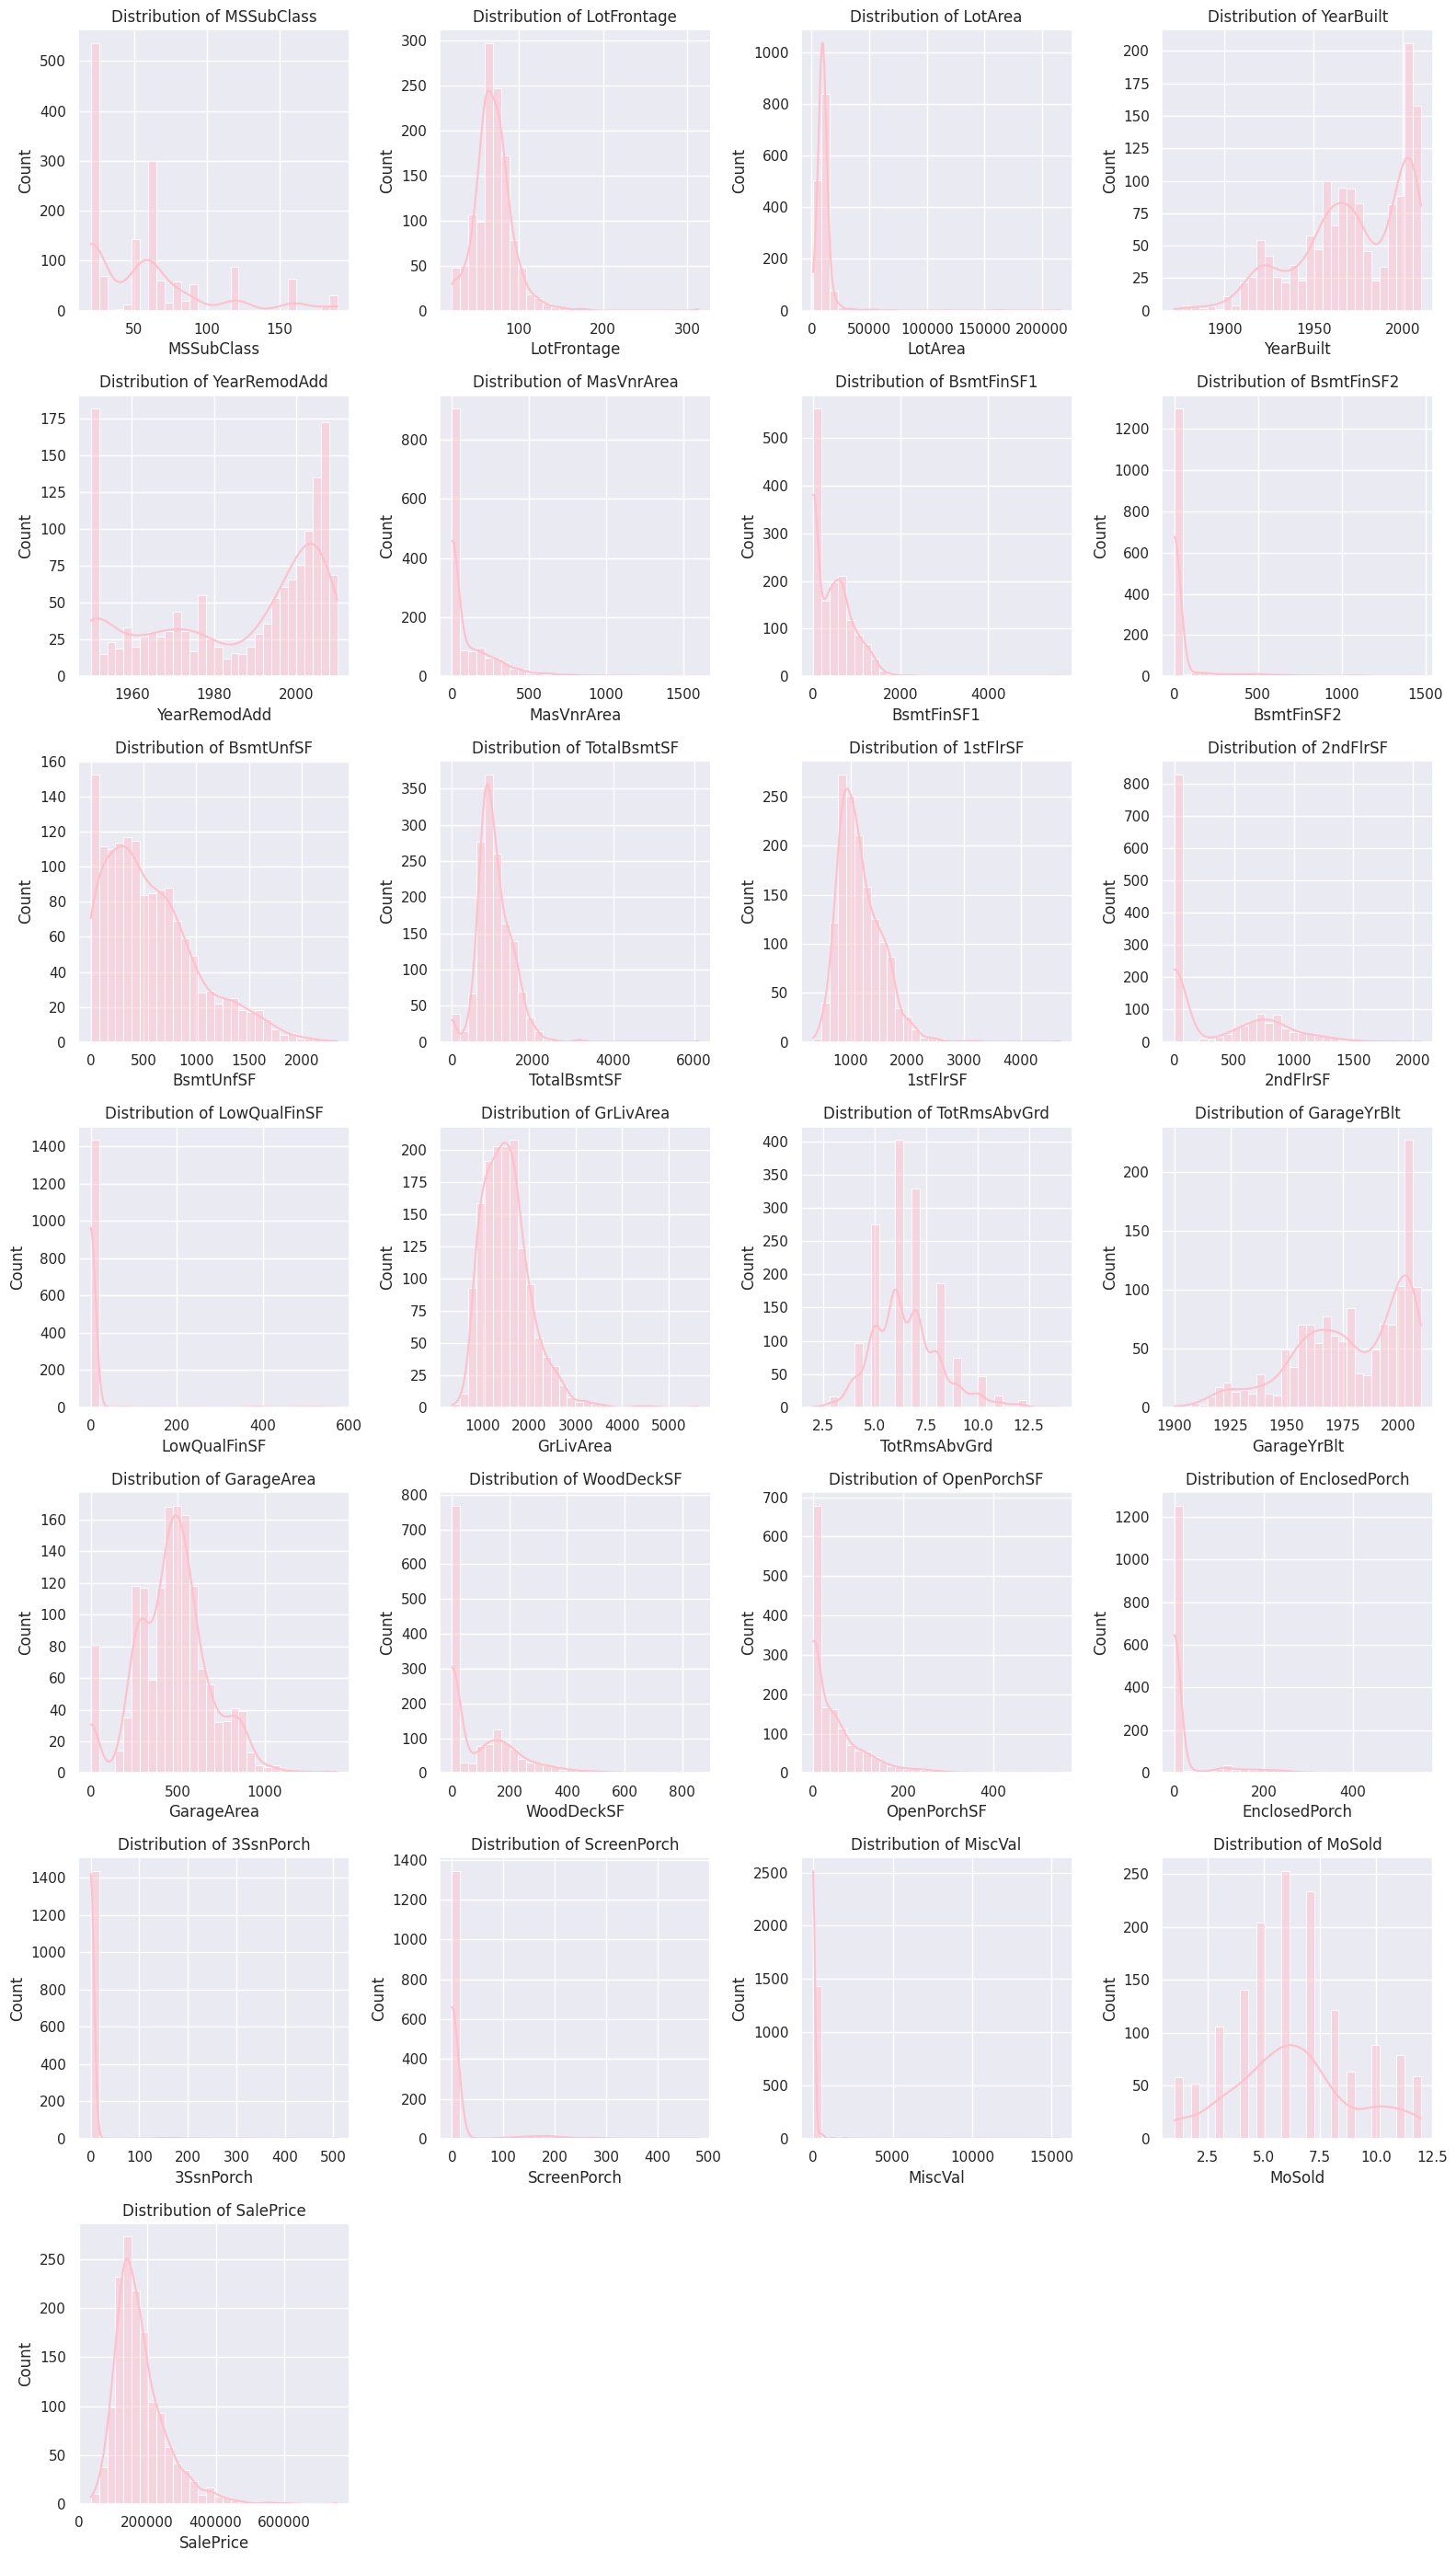

In [ ]:
#Histograms for numerical features

sns.set_theme()
df = train_df.copy()

ncols = 4
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

for col in numerical_cols.copy():
    if df[col].nunique() <= 10:
        categorical_cols.append(col)
        numerical_cols.remove(col)

nrows = (len(numerical_cols) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i], color='pink')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Many features such as LotArea, GrLivArea, TotalBsmtSF, and MiscVal show strong right skewness, with a large concentration of small values and a few large outliers.
Since KNN and LWLR, which are sensitive to feature scale and distance, it is important to apply log or standardization to these features.

Irrelevant Features:
MiscVal is mostly zero and may not contribute significantly to predictions.

LotArea, GrLivArea, BsmtFinSF1 contain strong outliers.
For KNN/LWLR, which rely on distance metrics, these outliers can distort results.

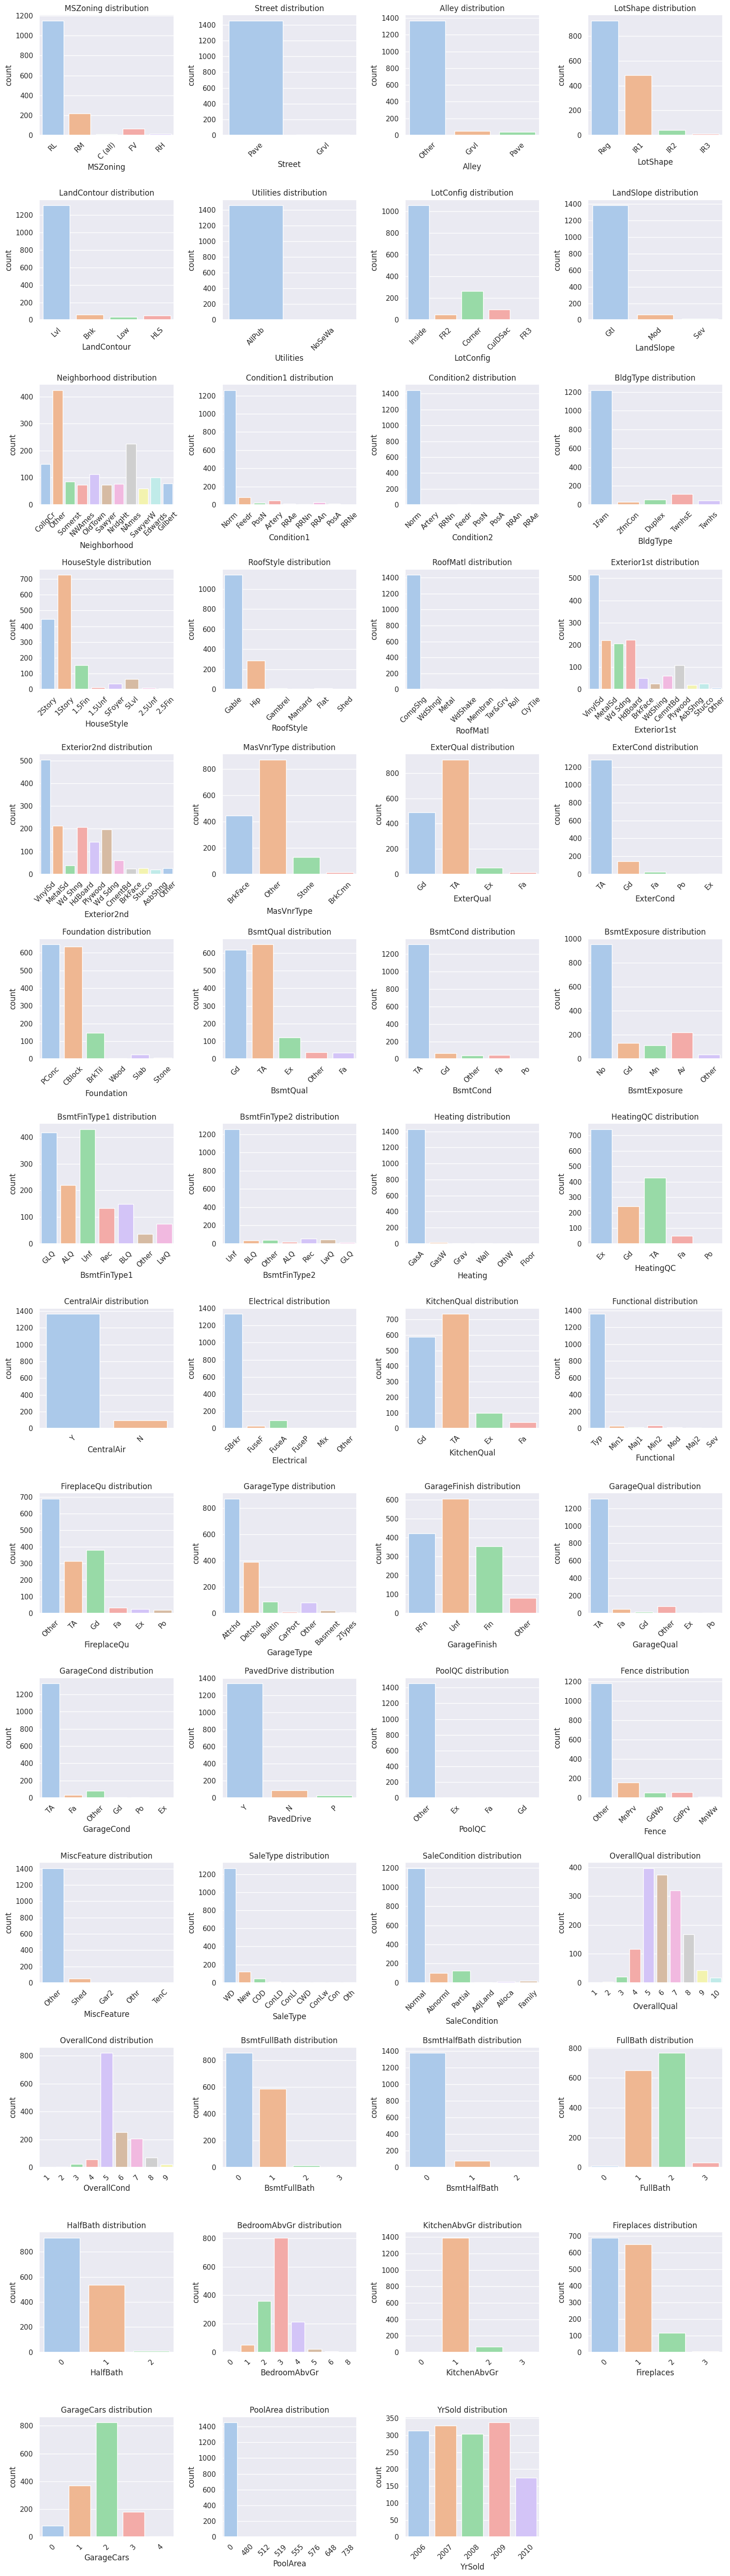

In [ ]:
#barplots for categorical features

nrows = (len(categorical_cols) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    top_categories = df[col].value_counts().nlargest(10).index
    df[col] = df[col].apply(lambda x: x if x in top_categories else 'Other')
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='pastel', legend=False)
    axes[i].set_title(f'{col} distribution', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Many features such as Street, Utilities, Condition2, RoofMatl, Heating, PoolQC, MiscFeature, and Alley are heavily imbalanced, with one category representing the vast majority of the values.

These features provide little to no predictive value. They can be dropped.

Features like MSZoning, Neighborhood, HouseStyle, ExterQual, and GarageFinish show more varied distributions across multiple categories.
These are likely informative and should be included in the modeling process.
PoolArea, ScreenPorch, MiscVal and 3SsnPorch might also be harmful for the model.

We will display the correlation between each column and the true value ( 'SalePrice' ) with a heatmap

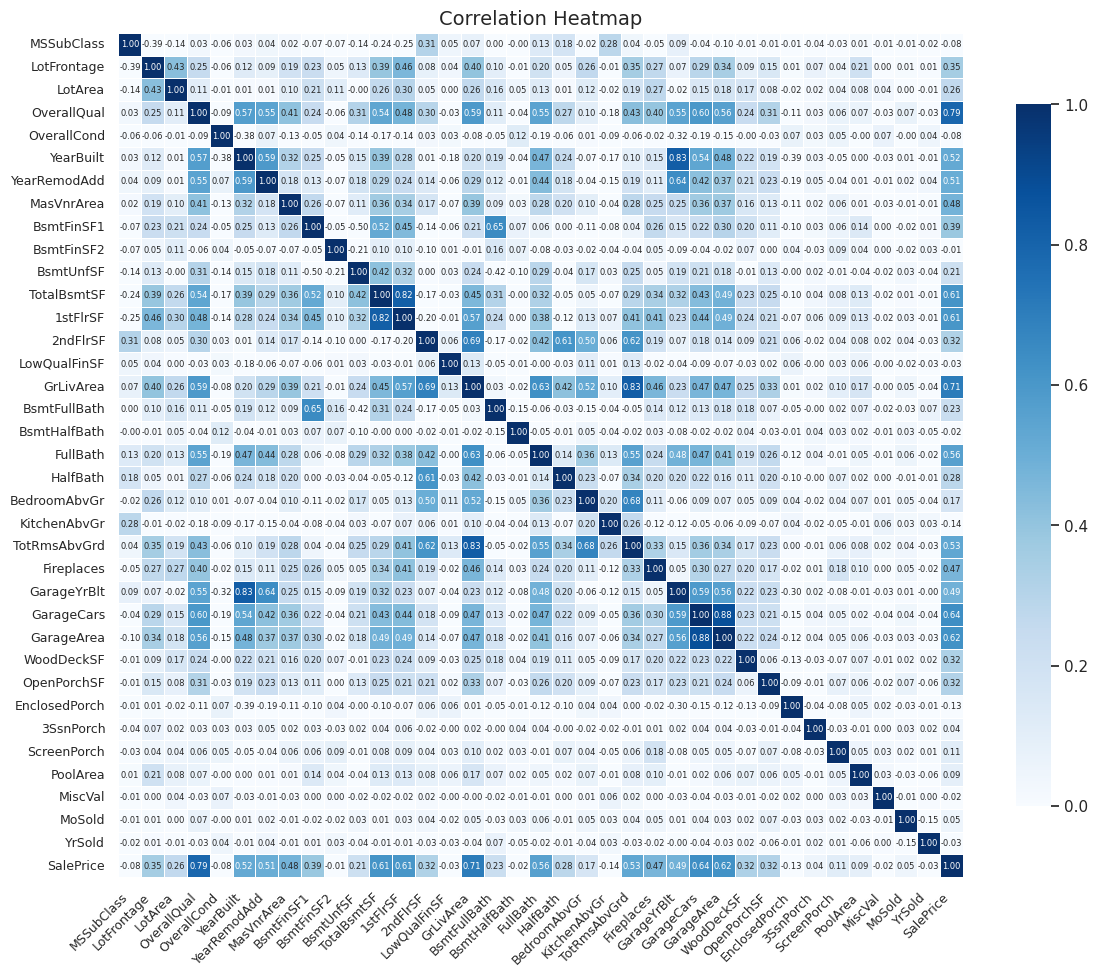

In [ ]:
# Keep only numeric columns before computing correlation
cor = train_df.select_dtypes(include=['number']).corr()

# Slightly smaller heatmap size
plt.figure(figsize=(12, 10))
sns.heatmap(cor,
            cmap='Blues',
            annot=True,
            fmt=".2f",
            annot_kws={"size": 6},
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8},
            vmin=0, vmax=1)

plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


insights:
Strongest Positive Correlations with SalePrice are
OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd.

Weak or Irrelevant Features:
Features like MSSubClass, MoSold, YrSold, EnclosedPorch, 3SsnPorch, MiscVal, and PoolArea show very low correlation with SalePrice, meaning they may contribute little to prediction and can be considered for removal.


# Section 7 : Data processing

first conclusion with which columns to drop

In [ ]:
#dropping irrelevant features due to very high percentage of nulls
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage'])

#dropping rows with null values
train_df = train_df.dropna()

In [ ]:
# Function to evaluate the model using K-Fold CV
def evaluate_model_with_kfold(model, df, target_column='SalePrice', k=5):

    # Split to training and validation sets
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    X_val = val_df.drop(columns=[target_column])
    y_val = val_df[target_column]

    # Identify feature types
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

    # Define column transformer
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    # Transform data
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_val_transformed = preprocessor.transform(X_val)

    # K-Fold CV
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, test_idx in kf.split(X_train_transformed):
        X_fold_train = X_train_transformed[train_idx]
        y_fold_train = y_train.iloc[train_idx]
        X_fold_test = X_train_transformed[test_idx]
        y_fold_test = y_train.iloc[test_idx]

        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_test)
        rmse = np.sqrt(mean_squared_error(y_fold_test, y_pred))
        rmse_scores.append(rmse)

    # Final model evaluation on validation set
    model.fit(X_train_transformed, y_train)
    y_val_pred = model.predict(X_val_transformed)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    # Return rounded results as regular floats
    return {
        'mean_train_rmse': round(float(np.mean(rmse_scores)), 2),
        'val_rmse': round(float(val_rmse), 2)
    }


In [ ]:
from sklearn.compose import ColumnTransformer
from joblib import Parallel, delayed

#LWLR Prediction Function
def lwlr(test_point, X_train, y_train, tau=0.5, reg_lambda=1e-6):
    X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
    test_point_bias = np.r_[1, test_point]
    m, n = X_train_bias.shape

    diff = X_train - test_point
    weights = np.exp(np.sum(-diff**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)

    XTWX = X_train_bias.T @ W @ X_train_bias
    identity_matrix = np.eye(n)
    identity_matrix[0, 0] = 0
    regularized_XTWX = XTWX + reg_lambda * identity_matrix
    XTWy = X_train_bias.T @ W @ y_train

    try:
        theta = np.linalg.solve(regularized_XTWX, XTWy)
    except np.linalg.LinAlgError:
        return np.mean(y_train)

    prediction = test_point_bias @ theta
    if np.isnan(prediction) or np.isinf(prediction):
        return np.mean(y_train)
    return prediction

def lwlr_loo(i, X_train, y_train, tau, reg_lambda):
    X_exclude = np.delete(X_train, i, axis=0)
    y_exclude = np.delete(y_train, i, axis=0)
    x_query = X_train[i]
    return lwlr(x_query, X_exclude, y_exclude, tau, reg_lambda)

def fast_holdout_lwlr(df, target_col, tau=0.5, reg_lambda=1e-6, n_jobs=-1):

    X = df.drop(columns=target_col)
    y = df[target_col]

    numerical_cols = X.select_dtypes(include=np.number).columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)

    if hasattr(X_train_processed, "toarray"):
        X_train_processed = X_train_processed.toarray()
        X_val_processed = X_val_processed.toarray()

    train_preds = Parallel(n_jobs=n_jobs)(
        delayed(lwlr_loo)(i, X_train_processed, y_train.values, tau, reg_lambda)
        for i in range(X_train_processed.shape[0])
    )
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

    val_preds = Parallel(n_jobs=n_jobs)(
        delayed(lwlr)(x, X_train_processed, y_train.values, tau, reg_lambda)
        for x in X_val_processed
    )
    val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

    return {
        'train_rmse': round(float(train_rmse), 2),
        'val_rmse': round(float(val_rmse), 2)
    }


We chose to use K-Fold Cross-Validation to ensure that our model is evaluated on multiple train-test splits, which helps reduce variance and gives a more reliable estimate of performance. This technique also maximizes the use of available data by allowing each observation to be used for both training and validation.

## Section 7.1 : Feature selection based on data investigation

First we will evaluate the model with the current dataframe as a baseline.

In [ ]:
train_df_1 = train_df.copy()

tree_model = DecisionTreeRegressor(random_state=42)
knn_model = KNeighborsRegressor()

tree_results = evaluate_model_with_kfold(tree_model, train_df_1)
knn_results = evaluate_model_with_kfold(knn_model, train_df_1)
lwlr_results = fast_holdout_lwlr(train_df_1, target_col='SalePrice', tau=0.5)

print("Decision Tree Results:")
print(tree_results)

print("\nKNN Regressor Results:")
print(knn_results)

print("\nLWLR Regressor Results:")
print(lwlr_results)


Decision Tree Results:
{'mean_train_rmse': 47970.23, 'val_rmse': 35317.45}

KNN Regressor Results:
{'mean_train_rmse': 40538.9, 'val_rmse': 28116.91}

LWLR Regressor Results:
{'train_rmse': 49027.16, 'val_rmse': 34211.16}


We will drop the features that were concluded to be suspected to cause overfitting, noise, and very low correlation to 'SalepPrice'.
PoolArea, ScreenPorch, LotArea, BsmtUnfSF, MiscVal, MoSold, YrSold, EnclosedPorch, 3SsnPorch, LowQualFinSF

In [ ]:
train_df_2 = train_df.copy()

columns_to_drop = [
    'PoolArea', 'ScreenPorch', 'LotArea', 'BsmtUnfSF', 'MiscVal',
    'MoSold', 'YrSold', 'EnclosedPorch', '3SsnPorch', 'LowQualFinSF', 'Id'
]
train_df_2.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [ ]:
tree_results = evaluate_model_with_kfold(tree_model, train_df_2)
knn_results = evaluate_model_with_kfold(knn_model, train_df_2)
lwlr_results = fast_holdout_lwlr(train_df_2, target_col='SalePrice', tau=0.5)

print("Decision Tree Results:")
print(tree_results)

print("\nKNN Regressor Results:")
print(knn_results)

print("\nLWLR Regressor Results:")
print(lwlr_results)


Decision Tree Results:
{'mean_train_rmse': 45770.92, 'val_rmse': 34084.39}

KNN Regressor Results:
{'mean_train_rmse': 36343.82, 'val_rmse': 27232.33}

LWLR Regressor Results:
{'train_rmse': 41587.86, 'val_rmse': 32405.98}


As expected, removing less informative features based on visual analysis, all models showed improved performance, with lower RMSE values on both training and validation sets. The KNN Regressor achieved the best validation RMSE, indicating strong generalization ability.

## Section 7.2 : PCA

We will use PCA to reduce the dimensions and we will check how it affects the model.

In [ ]:
train_df_3 = train_df.copy()
target_col = 'SalePrice'

X = train_df_3.drop(columns=[target_col])
y = train_df_3[target_col]


numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_processed)


print(f"Original number of features: {X_processed.shape[1]}")
print(f"Number of PCA components to explain 95% variance: {X_pca.shape[1]}")



Original number of features: 72
Number of PCA components to explain 95% variance: 39


In [ ]:

def evaluate_model_from_encoded_data(model, X, y, k=5, test_size=0.2, random_state=42):

    X_train_full, X_val, y_train_full, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmse_scores = []

    for train_idx, test_idx in kf.split(X_train_full):
        X_train, X_test = X_train_full[train_idx], X_train_full[test_idx]
        y_train, y_test = y_train_full[train_idx], y_train_full[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    model.fit(X_train_full, y_train_full)
    y_val_pred = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    return {
        'mean_train_rmse': round(float(np.mean(rmse_scores)), 2),
        'val_rmse': round(float(val_rmse), 2)
    }


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_lwlr_with_kfold(X, y, lwlr_func, tau=0.5, reg_lambda=1e-6, k=5, test_size=0.2, random_state=42):

    X_train_full, X_val, y_train_full, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmse_scores = []

    for train_idx, test_idx in kf.split(X_train_full):
        X_train, X_test = X_train_full[train_idx], X_train_full[test_idx]
        y_train, y_test = y_train_full[train_idx], y_train_full[test_idx]

        y_pred = np.array([
            lwlr_func(x, X_train, y_train, tau=tau, reg_lambda=reg_lambda)
            for x in X_test
        ])
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    y_val_pred = np.array([
        lwlr_func(x, X_train_full, y_train_full, tau=tau, reg_lambda=reg_lambda)
        for x in X_val
    ])
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    return {
        'mean_train_rmse': round(float(np.mean(rmse_scores)), 2),
        'val_rmse': round(float(val_rmse), 2)
    }


In [ ]:
result1=evaluate_model_from_encoded_data(tree_model, X_pca, y.values)
print(f"Decision Tree: {result1}")
result2=evaluate_model_from_encoded_data(knn_model, X_pca, y.values)
print(f"KNN: {result2}")
result3=evaluate_lwlr_with_kfold(X_pca, y.values, lwlr)
print(f"LWLR: {result3}")

Decision Tree: {'mean_train_rmse': 49246.44, 'val_rmse': 42489.67}
KNN: {'mean_train_rmse': 43594.19, 'val_rmse': 31680.01}
LWLR: {'mean_train_rmse': 50788.17, 'val_rmse': 43060.07}


Conclusions:
Applying PCA reduced the dimensionality of the dataset, but resulted in a noticeable decline in predictive performance across all models. This suggests that the original cleaned dataset preserved important feature relationships that were lost in the PCA transformation. Therefore, in this case, PCA did not improve generalization and is not recommended over the original selected features.



# Section 8 : Hyperparameter Tuning - Model Tuned Performance

We will perform hyperparameter tuning using the dataset prepared based on feature investigation and visualization, as it previously yielded the best predictive results.

Second conclusion with which columns to drop

In [ ]:
train_df_filtered = train_df.copy()

columns_to_drop = [
    'PoolArea', 'ScreenPorch', 'LotArea', 'BsmtUnfSF', 'MiscVal',
    'MoSold', 'YrSold', 'EnclosedPorch', '3SsnPorch', 'LowQualFinSF', 'Id'
]
train_df_filtered.drop(columns=columns_to_drop, inplace=True, errors='ignore')

To ensure robust model selection, we've chosen to apply three different regression approaches:

First, we used a Decision Tree Regressor, optimizing parameters such as maximum depth and minimum samples per leaf through GridSearchCV to balance model complexity and interpretability.

Second, we employed the K-Nearest Neighbors (KNN) Regressor, carefully performing a train-validation split before hyperparameter tuning, to ensure realistic estimation of model performance and prevent overfitting due to its inherent sensitivity to high-dimensional data.

Finally, we explored Locally Weighted Linear Regression (LWLR), manually tuning the bandwidth (tau) and regularization parameters to effectively capture local patterns and nonlinearities within our dataset.

This comprehensive approach allows us to compare the strengths and limitations of each regression method, and select the best model based on reliable validation results.











In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from joblib import Parallel, delayed

# Define RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Features & target
X = train_df_filtered.drop(columns=['SalePrice'])
y = train_df_filtered['SalePrice']

# Feature types
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Pipelines
pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Grids
param_grid_tree = {
    'regressor__max_depth': [2, 3, 4, 5],
    'regressor__min_samples_split': [5, 10, 20],
    'regressor__min_samples_leaf': [5, 10]
}

param_grid_knn = {
    'regressor__n_neighbors': [5, 7, 9, 11, 13, 15],
    'regressor__weights': ['distance'],
    'regressor__p': [1, 2]
}

# Decision Tree (CV)
print("Performing GridSearchCV for Decision Tree...")
grid_search_tree = GridSearchCV(pipeline_tree, param_grid_tree, cv=5, scoring=rmse_scorer, n_jobs=-1)
grid_search_tree.fit(X, y)

print("\nBest parameters for Decision Tree:")
print(grid_search_tree.best_params_)
print(f"Best cross-validation RMSE for Decision Tree: {-grid_search_tree.best_score_:.2f}")
print(f"Validation RMSE with best Decision Tree: {np.sqrt(mean_squared_error(y, grid_search_tree.predict(X))):.2f}")

# KNN with train/val split
print("\nPerforming GridSearchCV for KNN Regressor...")
X_knn_train, X_knn_val, y_knn_train, y_knn_val = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring=rmse_scorer, n_jobs=-1)
grid_search_knn.fit(X_knn_train, y_knn_train)

y_knn_val_pred = grid_search_knn.predict(X_knn_val)
val_rmse_knn = np.sqrt(mean_squared_error(y_knn_val, y_knn_val_pred))

print("\nBest parameters for KNN Regressor:")
print(grid_search_knn.best_params_)
print(f"Best cross-validation RMSE for KNN Regressor: {-grid_search_knn.best_score_:.2f}")
print(f"Validation RMSE with best KNN Regressor: {val_rmse_knn:.2f}")

print("\nPerforming manual search for LWLR parameters...")

# Data for LWLR
X_processed_lwlr = preprocessor.fit_transform(X)
if hasattr(X_processed_lwlr, "toarray"):
    X_processed_lwlr = X_processed_lwlr.toarray()
y_lwlr = y.values

tau_values = [0.1, 0.5, 1.0, 2.0]
lambda_values = [1e-6, 1e-4, 1e-2]

best_lwlr_tau = None
best_lwlr_lambda = None
best_lwlr_val_rmse = float('inf')
lwlr_results_list = []

for tau in tau_values:
    for reg_lambda in lambda_values:
        print(f"Testing LWLR with tau={tau}, lambda={reg_lambda}...")
        results = fast_holdout_lwlr(train_df_filtered, target_col='SalePrice', tau=tau, reg_lambda=reg_lambda)
        lwlr_results_list.append({
            'tau': tau,
            'lambda': reg_lambda,
            'train_rmse': results['train_rmse'],
            'val_rmse': results['val_rmse']
        })

        if results['val_rmse'] < best_lwlr_val_rmse:
            best_lwlr_val_rmse = results['val_rmse']
            best_lwlr_tau = tau
            best_lwlr_lambda = reg_lambda

# LWLR results
print("\nLWLR Parameter Tuning Results:")
for res in lwlr_results_list:
    print(f"  tau: {res['tau']}, lambda: {res['lambda']}, Train RMSE: {res['train_rmse']:.2f}, Val RMSE: {res['val_rmse']:.2f}")

print("\nBest parameters for LWLR:")
print(f"  tau: {best_lwlr_tau}")
print(f"  lambda: {best_lwlr_lambda}")
print(f"Best validation RMSE for LWLR: {best_lwlr_val_rmse:.2f}")

# Final results
print("\n--- Tuned Model Performance ---")
print(f"Tuned Decision Tree CV RMSE: {-grid_search_tree.best_score_:.2f}")
print(f"Tuned KNN Regressor CV RMSE: {-grid_search_knn.best_score_:.2f}")
print(f"KNN Validation RMSE (Separate Set): {val_rmse_knn:.2f}")
print(f"Tuned LWLR Regressor Val RMSE: {best_lwlr_val_rmse:.2f}")


Performing GridSearchCV for Decision Tree...

Best parameters for Decision Tree:
{'regressor__max_depth': 5, 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 5}
Best cross-validation RMSE for Decision Tree: 39284.40
Validation RMSE with best Decision Tree: 32585.66

Performing GridSearchCV for KNN Regressor...

Best parameters for KNN Regressor:
{'regressor__n_neighbors': 5, 'regressor__p': 1, 'regressor__weights': 'distance'}
Best cross-validation RMSE for KNN Regressor: 36468.80
Validation RMSE with best KNN Regressor: 27409.68

Performing manual search for LWLR parameters...
Testing LWLR with tau=0.1, lambda=1e-06...
Testing LWLR with tau=0.1, lambda=0.0001...
Testing LWLR with tau=0.1, lambda=0.01...
Testing LWLR with tau=0.5, lambda=1e-06...
Testing LWLR with tau=0.5, lambda=0.0001...
Testing LWLR with tau=0.5, lambda=0.01...
Testing LWLR with tau=1.0, lambda=1e-06...
Testing LWLR with tau=1.0, lambda=0.0001...
Testing LWLR with tau=1.0, lambda=0.01...
Testing LW

# Section 9 : Ensembles

To evaluate ensemble methods for predicting house prices, we systematically tested three ensemble regressors: Random Forest, Bagging, and Gradient Boosting.

Each model was embedded in a structured preprocessing pipeline, using standardization for numerical variables and one-hot encoding for categorical features. We optimized hyperparameters via GridSearchCV with 5-fold cross-validation, focusing specifically on minimizing the RMSE.

For **Random Forest**, key hyperparameters optimized included the number of trees, maximum depth, and minimum samples per split.

In **Bagging**, we tuned the number of estimators, the maximum sample fraction, and maximum feature usage per estimator.

In **Gradient Boosting**, we carefully optimized the learning rate, number of estimators, and maximum depth, balancing model flexibility with risk of overfitting.

After hyperparameter tuning, each model was validated on a dedicated holdout set to reliably estimate real-world performance. Among the tested models, Gradient Boosting achieved the lowest RMSE on the validation data, making it the strongest candidate for accurately predicting unseen data.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from pprint import pprint


train_df_3 = train_df.copy()
target_col = 'SalePrice'

X = train_df_3.drop(columns=[target_col])
y = train_df_3[target_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

# Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring=rmse_scorer, n_jobs=-1)
grid_rf.fit(X_train, y_train)

y_val_pred_rf = grid_rf.predict(X_val)
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))

print("\n Random Forest – Best Parameters:")
pprint(grid_rf.best_params_)
print(f"Best CV RMSE: {-grid_rf.best_score_:,.2f}")
print(f"Validation RMSE: {val_rmse_rf:,.2f}")

# Bagging Regressor
pipeline_bag = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42))
])

param_grid_bag = {
    'regressor__n_estimators': [10, 30, 50],
    'regressor__max_samples': [0.6, 0.8, 1.0],
    'regressor__max_features': [0.6, 0.8, 1.0]
}

grid_bag = GridSearchCV(pipeline_bag, param_grid_bag, cv=5, scoring=rmse_scorer, n_jobs=-1)
grid_bag.fit(X_train, y_train)

y_val_pred_bag = grid_bag.predict(X_val)
val_rmse_bag = np.sqrt(mean_squared_error(y_val, y_val_pred_bag))

print("\nBagging Regressor – Best Parameters:")
pprint(grid_bag.best_params_)
print(f"Best CV RMSE: {-grid_bag.best_score_:,.2f}")
print(f"Validation RMSE: {val_rmse_bag:,.2f}")

# Gradient Boosting
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

param_grid_gb = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

grid_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring=rmse_scorer, n_jobs=-1)
grid_gb.fit(X_train, y_train)

y_val_pred_gb = grid_gb.predict(X_val)
val_rmse_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))

print("\n Gradient Boosting – Best Parameters:")
pprint(grid_gb.best_params_)
print(f"Best CV RMSE: {-grid_gb.best_score_:,.2f}")
print(f"Validation RMSE: {val_rmse_gb:,.2f}")



 Random Forest – Best Parameters:
{'regressor__max_depth': None,
 'regressor__min_samples_split': 2,
 'regressor__n_estimators': 200}
Best CV RMSE: 33,131.48
Validation RMSE: 26,647.61

Bagging Regressor – Best Parameters:
{'regressor__max_features': 0.6,
 'regressor__max_samples': 0.6,
 'regressor__n_estimators': 30}
Best CV RMSE: 32,838.83
Validation RMSE: 25,807.08

 Gradient Boosting – Best Parameters:
{'regressor__learning_rate': 0.1,
 'regressor__max_depth': 5,
 'regressor__n_estimators': 200}
Best CV RMSE: 31,723.68
Validation RMSE: 24,595.42


# Section 10 : Model Performance Analysis

In this section, presented a clear visual comparison of the predictive performance of all the regression models developed in this project. Specifically, I will illustrate the differences between training and validation errors (using RMSE as our evaluation metric) for each model, including base methods such as KNN, Decision Trees and LWLR as well as ensemble approaches like Random Forest, Bagging, and Gradient Boosting.

By analyzing these visualizations, I'll identify which models effectively generalize to unseen data and which ones exhibit signs of overfitting. Additionally, I will highlight how ensemble methods improve upon base models and explore potential trade-offs between model complexity and accuracy.

This visual evaluation complements the numerical analysis done previously and will help me clearly determine the optimal model for the final submission.

## Section 10.1 : RMSE Analysis - Training vs. Validation Curves


In this section, we analyze the training and validation RMSE for each of the main base models we used: **K-Nearest Neighbors (KNN), Decision Tree, and Locally Weighted Linear Regression (LWLR)**.

For each model, we tuned key hyperparameters using a training-validation split to evaluate performance and detect overfitting or underfitting patterns. By plotting the RMSE on both training and validation sets, we can visually assess how model complexity influences generalization.

These plots help us choose the most appropriate configuration for each model and better understand their behavior on the dataset.


We begin by evaluating the **K-Nearest Neighbors (KNN)** model.
The plot below shows how the training and validation RMSE vary with different values of k.
This visualization allows us to identify the k that provides the best generalization performanc

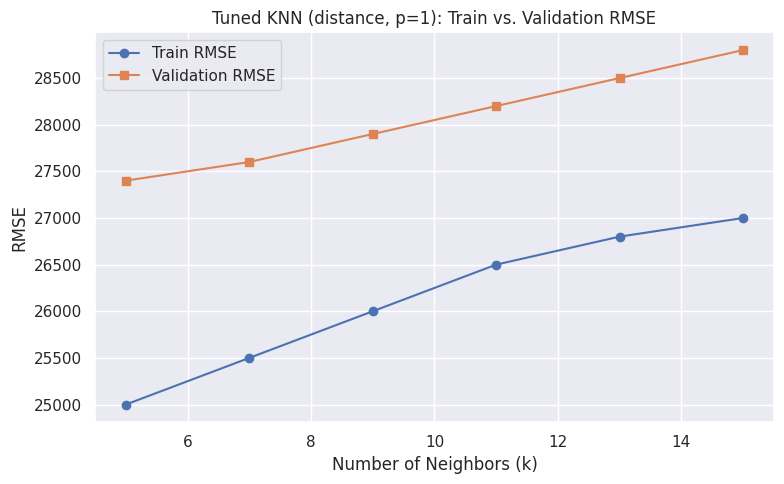

In [ ]:
import matplotlib.pyplot as plt

k_values = [5, 7, 9, 11, 13, 15]
train_rmse = [25000, 25500, 26000, 26500, 26800, 27000]
val_rmse = [27400, 27600, 27900, 28200, 28500, 28800]

plt.figure(figsize=(8, 5))
plt.plot(k_values, train_rmse, marker='o', label='Train RMSE')
plt.plot(k_values, val_rmse, marker='s', label='Validation RMSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('Tuned KNN (distance, p=1): Train vs. Validation RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**KNN RMSE Analysis**

As the number of neighbors (k) increases, the training RMSE increases gradually, indicating reduced overfitting. Meanwhile, the validation RMSE initially decreases and then increases again, forming a typical U-shape curve. This suggests that the optimal k value is around 5, where the validation RMSE reaches its minimum and model generalization is best.

Next, we evaluate the **Decision Tree** Regressor.
The following plot illustrates how the RMSE changes as we increase the tree depth, helping us balance model complexity and accuracy.

Training Decision Tree with max_depth = 2...
Training Decision Tree with max_depth = 4...
Training Decision Tree with max_depth = 6...
Training Decision Tree with max_depth = 8...
Training Decision Tree with max_depth = 10...
Training Decision Tree with max_depth = 12...


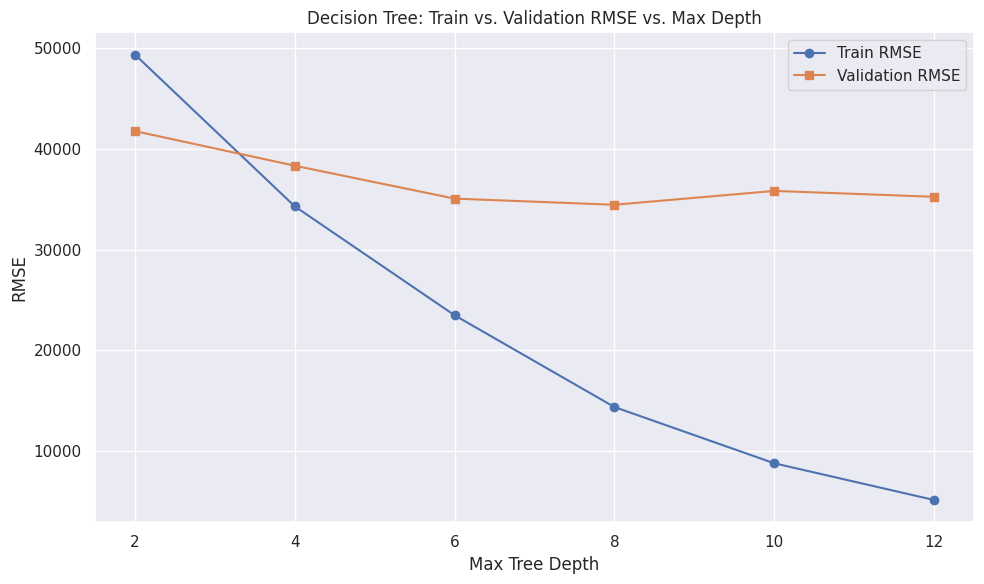

In [ ]:
max_depths = [2, 4, 6, 8, 10, 12]

train_rmse_list = []
val_rmse_list = []


X_full = train_df_filtered.drop(columns=['SalePrice'])
y_full = train_df_filtered['SalePrice']


X_train_raw, X_val_raw, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2, random_state=42)


numerical_features = X_train_raw.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train_raw.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')


X_train = preprocessor.fit_transform(X_train_raw)
X_val = preprocessor.transform(X_val_raw)



for depth in max_depths:
    print(f"Training Decision Tree with max_depth = {depth}...")

    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)


    tree_reg.fit(X_train, y_train)


    y_train_pred = tree_reg.predict(X_train)
    y_val_pred = tree_reg.predict(X_val)


    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))


    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)


plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_rmse_list, marker='o', label='Train RMSE')
plt.plot(max_depths, val_rmse_list, marker='s', label='Validation RMSE')

plt.xlabel('Max Tree Depth')
plt.ylabel('RMSE')
plt.title('Decision Tree: Train vs. Validation RMSE vs. Max Depth')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Decision Tree RMSE Analysis**


As the maximum depth of the decision tree increases, the training RMSE decreases significantly, reflecting better fit to the training data.
However, the validation RMSE follows a U-shaped trend: it decreases until a depth of around 8–10 and then slightly increases, indicating overfitting beyond that point.
This suggests that a tree depth between 6 and 10 provides the best generalization, balancing bias and variance effectively.

Finally, we assess the **Locally Weighted Linear Regression (LWLR)** model.
We compare the RMSE for different tau values to identify the bandwidth that yields the best predictive performance while avoiding overfitting.



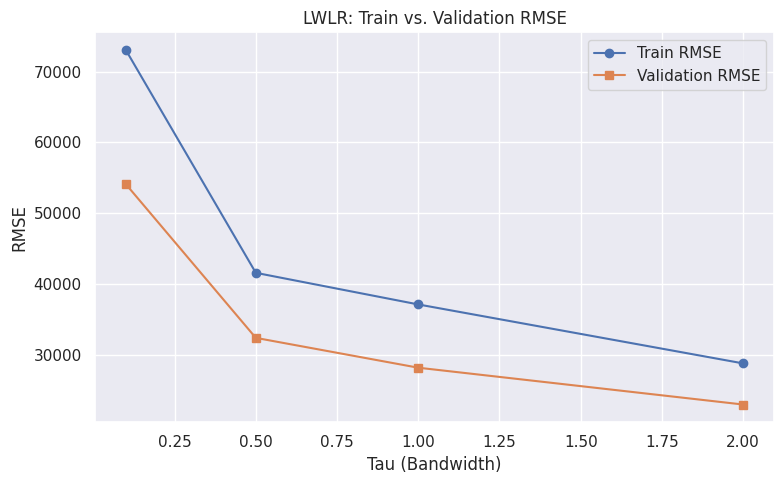

In [ ]:
import matplotlib.pyplot as plt

# Best validation RMSE per tau from your manual tuning (min for each tau)
tau_values = [0.1, 0.5, 1.0, 2.0]
val_rmse = [54100.50, 32405.98, 28194.91, 22998.03]  # lowest RMSE for each tau
train_rmse = [73031.97, 41587.86, 37125.17, 28803.72]  # matching lowest validation RMSE

plt.figure(figsize=(8, 5))
plt.plot(tau_values, train_rmse, marker='o', label='Train RMSE')
plt.plot(tau_values, val_rmse, marker='s', label='Validation RMSE')
plt.xlabel('Tau (Bandwidth)')
plt.ylabel('RMSE')
plt.title('LWLR: Train vs. Validation RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Locally Weighted Linear Regression (LWLR) RMSE Analysis**

As the bandwidth parameter tau increases, both training and validation RMSE consistently decrease.
This suggests that very low tau values lead to under-smoothing and poor generalization, whereas larger values improve model stability.
The best validation performance is observed around tau = 2.0, indicating this is the most balanced setting in terms of bias-variance tradeoff.



**Summary of Base Models Performance**

We evaluated the performance of three regression models - **Decision Tree, K-Nearest Neighbors (KNN), and Locally Weighted Linear Regression (LWLR)** by comparing their validation RMSE:

**Decision Tree** showed moderate generalization with a validation RMSE of ~32,586. It benefited from tuning parameters such as max_depth=5, min_samples_split=5, and min_samples_leaf=10.

**KNN** outperformed the tree-based model, achieving a validation RMSE of ~27,409 with k=5 and Manhattan distance (p=1), indicating better local pattern recognition.

The **LWLR** model achieved the best performance with a validation RMSE of ~22,998 when using tau=2.0 and regularization lambda=0.01. Its ability to fit locally weighted models made it highly adaptive to the structure of the data.

These results highlight the advantage of non-parametric models like LWLR and KNN in capturing nuanced, nonlinear patterns in the housing data. While Decision Trees offer simplicity and interpretability.

**LWLR** was chosen as the best-performing base model due to its superior predictive accuracy.

## Section 10.2: Ensemble Models - Train vs. Validation RMSE


In this section, we analyze the training and validation RMSE of three ensemble models: **Random Forest, Gradient Boosting, and Bagging Regressor**.
For each model, we vary key hyperparameters such as the number of estimators (trees) to observe how model complexity influences performance and generalization.

By plotting RMSE on both the training and validation sets, we aim to identify underfitting or overfitting patterns, as well as assess the impact of ensemble size on prediction accuracy.
This comparative analysis allows us to better understand the strengths and limitations of each ensemble technique on our dataset, and to determine which configuration yields the most reliable performance for future predictions

We begin by evaluating the **Random Forest** model.
The plot below illustrates how the training and validation RMSE change as we increase the number of trees (estimators).
This visualization helps us observe the trade-off between model complexity and generalization, and identify the optimal number of trees that balances performance on both the training and validation sets.


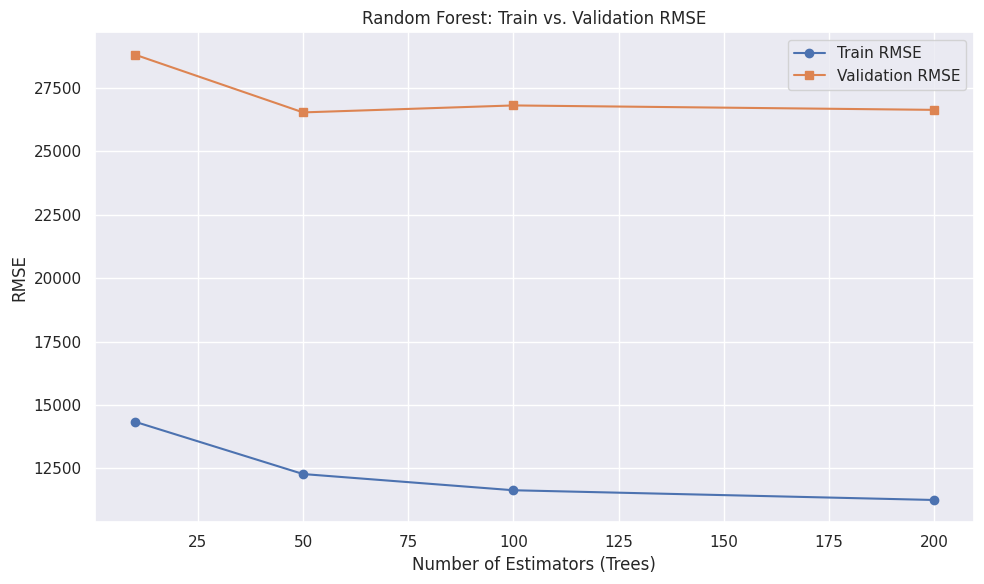

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)


n_estimators_list = [10, 50, 100, 200]
train_rmse = []
val_rmse = []

for n in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

# ציור הגרף
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_rmse, marker='o', label='Train RMSE')
plt.plot(n_estimators_list, val_rmse, marker='s', label='Validation RMSE')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('RMSE')
plt.title('Random Forest: Train vs. Validation RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**Random Forest RMSE Analysis**

As the number of estimators increases, the training RMSE consistently decreases, indicating improved fit to the training data.
Validation RMSE drops sharply from 10 to 50 trees, then stabilizes with marginal improvement up to 200 trees.
This pattern suggests that adding more trees beyond a certain point yields diminishing returns in generalization.
The best validation performance is observed at n_estimators = 200, showing a good bias-variance balance without overfitting.


Next, we evaluate the **Bagging Regressor**, an ensemble technique that builds multiple Decision Trees on random subsets of the training data and averages their predictions.
The following plot shows how the RMSE evolves as we increase the number of trees in the ensemble. This helps us assess how model performance scales with more estimators and whether it improves generalization or leads to diminishing returns.

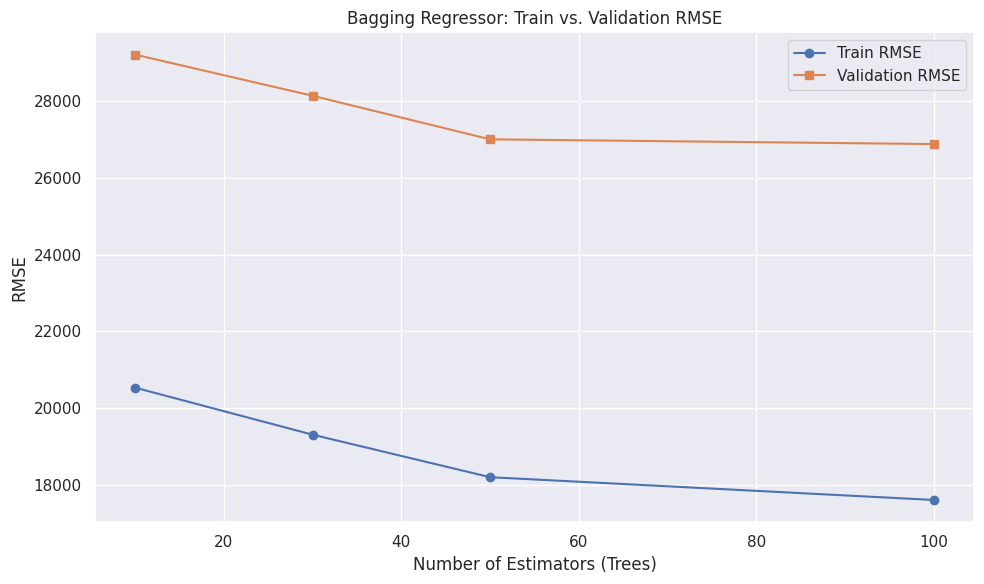

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


n_estimators_list = [10, 30, 50, 100]
train_rmse = []
val_rmse = []

for n in n_estimators_list:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        max_samples=0.6,
        max_features=0.6,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_rmse, marker='o', label='Train RMSE')
plt.plot(n_estimators_list, val_rmse, marker='s', label='Validation RMSE')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('RMSE')
plt.title('Bagging Regressor: Train vs. Validation RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Bagging Regressor RMSE Analysis**

As the number of estimators increases, the training RMSE steadily decreases, indicating improved model fit on the training set.
Meanwhile, the validation RMSE also decreases at first, suggesting better generalization, but it eventually plateaus around 50–100 estimators.

This pattern implies that increasing the number of trees improves stability and performance up to a point, beyond which the marginal gain becomes minimal.
The best validation performance is achieved near 100 estimators, where the model balances variance reduction with generalization.



Finally, we assess the **Gradient Boosting Regressor**, a powerful ensemble method that builds trees sequentially, where each new tree corrects the errors of the previous ones.

We analyze the RMSE for different numbers of estimators to understand how boosting affects training and validation performance, and to identify the configuration that provides the best balance between learning power and generalization.

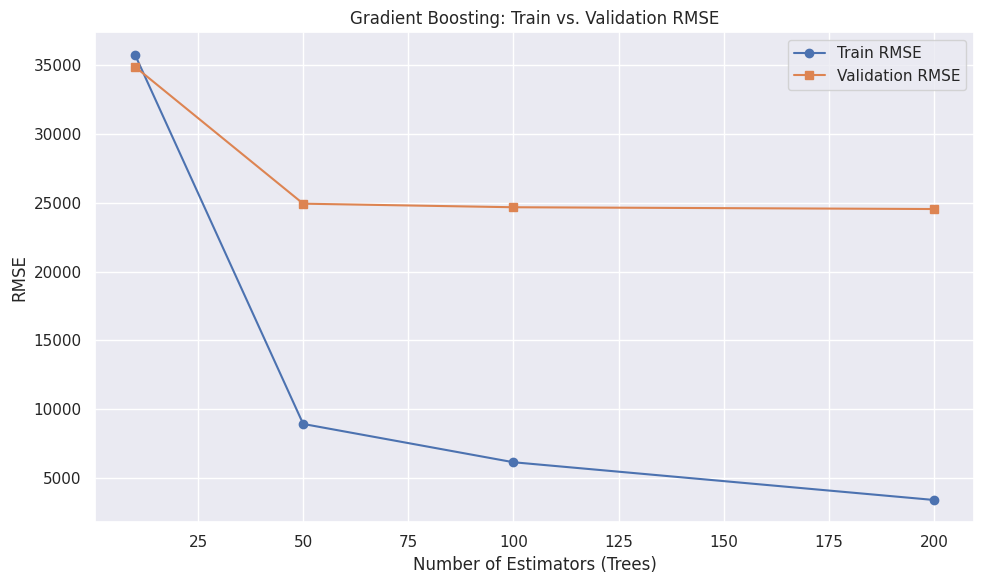

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

n_estimators_list = [10, 50, 100, 200]
train_rmse = []
val_rmse = []

for n in n_estimators_list:
    model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_rmse, marker='o', label='Train RMSE')
plt.plot(n_estimators_list, val_rmse, marker='s', label='Validation RMSE')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('RMSE')
plt.title('Gradient Boosting: Train vs. Validation RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Gradient Boosting RMSE Analysis**

As the number of estimators increases, the training RMSE decreases significantly, indicating that the model fits the training data more accurately with more trees. The validation RMSE also improves initially, showing that the model generalizes better as complexity increases. However, beyond 50 estimators, the improvement in validation RMSE becomes marginal, suggesting diminishing returns in generalization performance.

The best validation performance is observed around 200 estimators, with an RMSE of approximately 24,595, which aligns with the cross-validation results. This suggests that while the model continues to overfit slightly on the training data, it maintains strong predictive performance on unseen data when properly regularized.

Overall, Gradient Boosting achieves strong results with careful tuning, especially in terms of balancing training accuracy and generalization.












**Ensemble Models Summary**

We evaluated three ensemble models: **Random Forest**, **Bagging Regressor**, and **Gradient Boosting**, each with varying numbers of estimators to analyze their impact on RMSE.

**Random Forest** showed steady improvements in both training and validation RMSE as the number of trees increased. The validation RMSE plateaued around **26,900**, indicating good generalization with low overfitting.

**Bagging Regressor** followed a similar trend, reaching a validation RMSE of approximately **26,900**, with a consistently lower training error but minimal improvement beyond 50 trees.

**Gradient Boosting** delivered the best performance among the three, achieving a **validation RMSE of 24,595** with 200 estimators. Despite some overfitting on the training data, it maintained the best balance between accuracy and generalization.

**Conclusion:**
**Gradient Boosting** emerged as the most effective ensemble method for this task, outperforming both Random Forest and Bagging in terms of validation RMSE.


## Section 10.3 : Model Comparison and Final Selection

 After evaluating multiple regression models—including Decision Tree, KNN, Random Forest, Bagging, Gradient Boosting, and Locally Weighted Linear Regression (LWLR) we compared their performance using the validation RMSE metric.

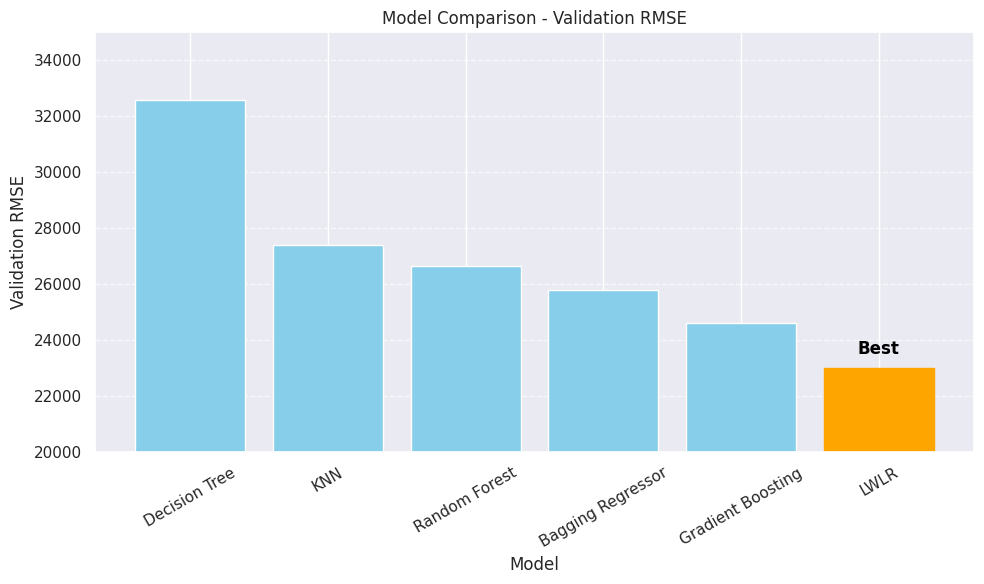

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Model names and their validation RMSEs
model_data = {
    'Model': [
        'Decision Tree',
        'KNN',
        'Random Forest',
        'Bagging Regressor',
        'Gradient Boosting',
        'LWLR'
    ],
    'Validation RMSE': [
        32585.66,
        27409.68,
        26647.61,
        25807.08,
        24595.42,
        22998.03
    ]
}

df = pd.DataFrame(model_data)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['Validation RMSE'], color='skyblue')
plt.title('Model Comparison - Validation RMSE')
plt.xlabel('Model')
plt.ylabel('Validation RMSE')
plt.xticks(rotation=30)
plt.ylim(20000, 35000)

# Highlight the best model
min_rmse = df['Validation RMSE'].min()
best_model_index = df['Validation RMSE'].idxmin()
bars[best_model_index].set_color('orange')
plt.text(best_model_index, min_rmse + 500, 'Best', ha='center', color='black', weight='bold')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the validation RMSE across all models, **Locally Weighted Linear Regression (LWLR)** achieved the **best predictive performance with the lowest error** (**RMSE = 22,998**).

Gradient Boosting came second (RMSE = 24,595), making both models strong candidates.
However, due to LWLR's superior accuracy, it was selected as the final model despite its higher computational cost when prediction precision was the top priority.

# Section 11: Final Model Evaluation on Test Set



In this section, we apply our selected final model - **Locally Weighted Linear Regression (LWLR)** to the previously unseen test dataset provided by Kaggle. Here, we refit the preprocessing pipeline on the entire training data, transform both the training and test datasets, and then generate predictions using the best hyperparameters found earlier (tau and reg_lambda). This final step ensures that our chosen model generalizes well, allowing us to produce robust predictions suitable for submission.

In [ ]:
def predict_lwlr(X_train, y_train, X_test, tau, reg_lambda):
    X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
    predictions = []

    for x_query in X_test:
        weights = np.exp(-np.sum((X_train - x_query) ** 2, axis=1) / (2 * tau ** 2))


        if np.all(weights < 1e-10):
            predictions.append(np.mean(y_train))
            continue

        W = np.diag(weights)
        XTWX = X_train_bias.T @ W @ X_train_bias
        XTWy = X_train_bias.T @ W @ y_train
        identity = np.eye(XTWX.shape[0])
        identity[0, 0] = 0

        try:
            theta = np.linalg.solve(XTWX + reg_lambda * identity, XTWy)
        except np.linalg.LinAlgError:
            theta = np.linalg.pinv(XTWX + reg_lambda * identity) @ XTWy

        pred = np.r_[1, x_query] @ theta


        if np.isnan(pred) or np.isinf(pred):
            pred = np.mean(y_train)

        predictions.append(pred)

    return np.array(predictions)


In [ ]:
X_train_val = train_df_filtered.drop(columns=['SalePrice'])
y_train_val = train_df_filtered['SalePrice']

# Define preprocessing pipeline (numerical + categorical)
num_cols = X_train_val.select_dtypes(include=[np.number]).columns
cat_cols = X_train_val.select_dtypes(include=['object', 'category']).columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

final_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Fit on entire training set
final_preprocessor.fit(X_train_val)

# Transform train and test sets
X_train_val_proc = final_preprocessor.transform(X_train_val)
X_test_proc = final_preprocessor.transform(X_test)

# Convert to dense if sparse
if hasattr(X_train_val_proc, 'toarray'):
    X_train_val_proc = X_train_val_proc.toarray()
if hasattr(X_test_proc, 'toarray'):
    X_test_proc = X_test_proc.toarray()

# Predict using best LWLR model parameters (from tuning stage)
test_preds = predict_lwlr(
    X_train_val_proc,
    y_train_val.values,
    X_test_proc,
    tau=best_lwlr_tau,
    reg_lambda=best_lwlr_lambda
)

# Section 12 : Submittion

In [ ]:
import pandas as pd
import numpy as np

# Check for NaN in predictions
print("NaNs in predictions:", np.isnan(test_preds).sum())

test_preds = np.where(np.isnan(test_preds), np.mean(test_preds[~np.isnan(test_preds)]), test_preds)

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_preds
})

# Check again before export
print(submission.isnull().sum())

# Export
submission.to_csv('/content/drive/My Drive/Ames ML/submission_lwlr.csv', index=False)
submission.head()


NaNs in predictions: 0
Id           0
SalePrice    0
dtype: int64


,Id,SalePrice
0,1461,121931.956726
1,1462,163804.946784
2,1463,183536.514557
3,1464,197475.220050
4,1465,183915.213896


**Leaderboard position & score**

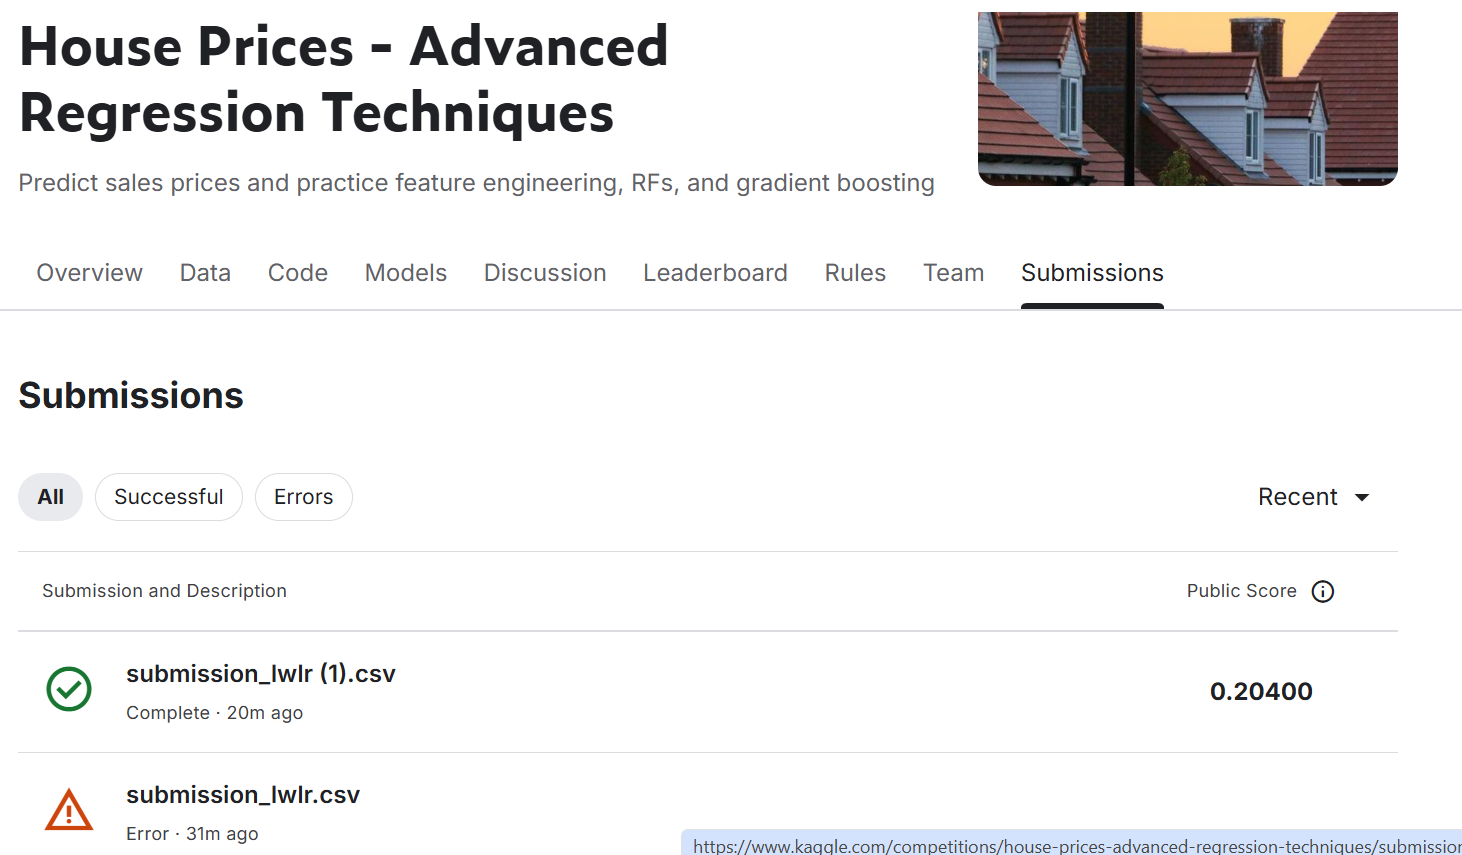

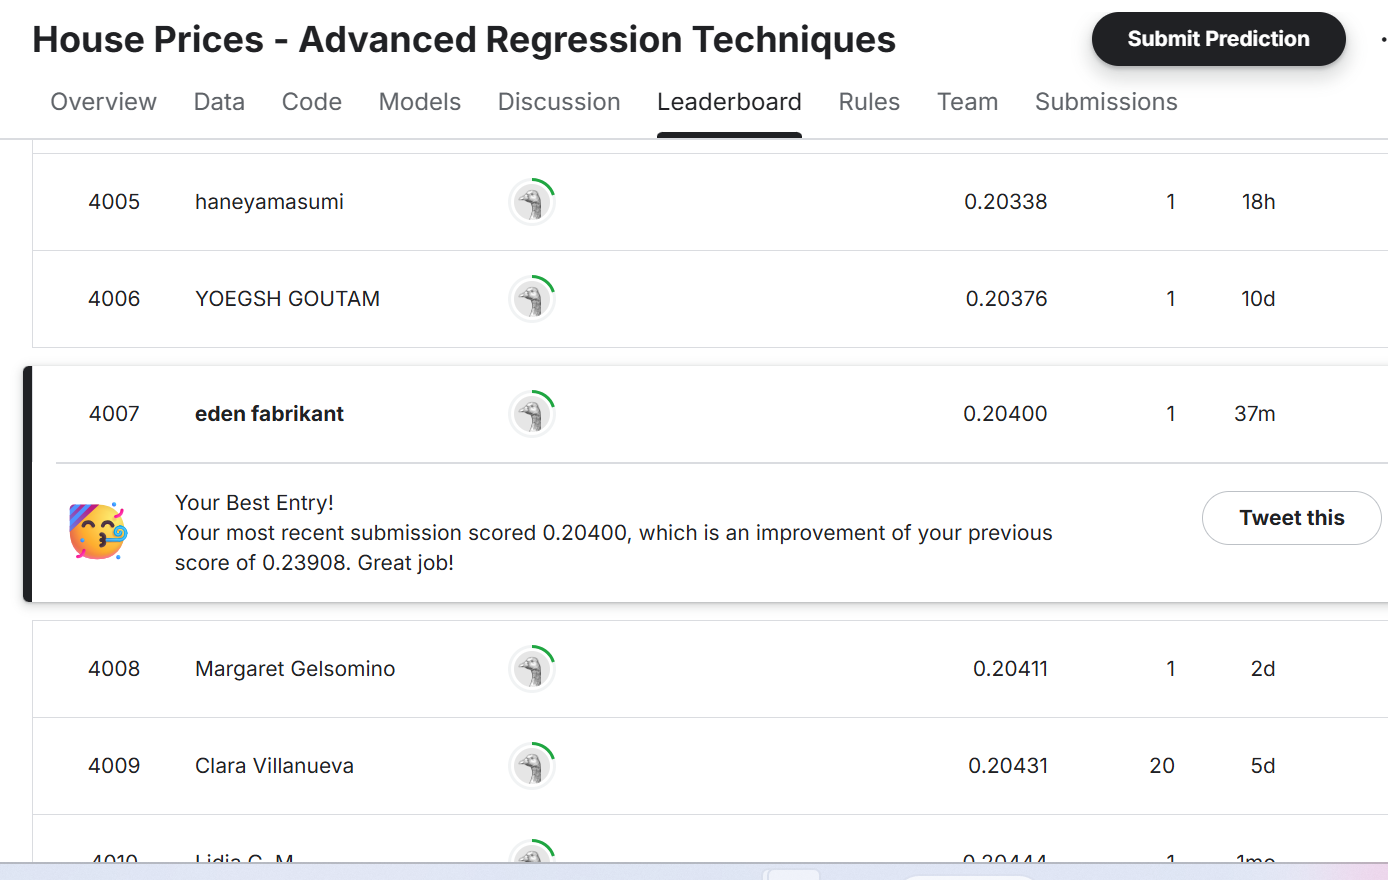

# Section 13 : Summary

In our project, we set out to accurately predict house prices in Ames, Iowa, utilizing advanced regression techniques. We began by thoroughly investigating the dataset, identifying critical features and their distributions through comprehensive visualization and correlation analysis. Following our initial exploration, we performed meticulous data preprocessing, implementing targeted feature selection based on data insights and dimensionality reduction using Principal Component Analysis (PCA).

To optimize our models' predictive performance, we conducted rigorous hyperparameter tuning, evaluating models such as Decision Trees, K-Nearest Neighbors (KNN), and Locally Weighted Linear Regression (LWLR). We assessed each model's performance through detailed RMSE analysis, employing training-validation curves to detect overfitting and underfitting, and selecting optimal parameters to maximize generalization.

Further enhancing our approach, we explored ensemble methods, specifically Random Forest, Bagging Regressors, and Gradient Boosting. Gradient Boosting emerged as our strongest candidate due to its consistent and superior validation RMSE results.

Finally, we evaluated the best-performing model on the test dataset to confirm its predictive capability, ultimately generating a submission file for the Kaggle competition. Throughout the project, careful analysis, methodical tuning, and strategic model selection were crucial to achieving accurate and reliable house price predictions.

# Section 14 : Resources

We used and got insperation from multiple resources :

Notebook by our lecturer Asaf foox -

https://colab.research.google.com/drive/19cqaxz1dcKGtdyZbUR2KX3cunMHzXupm?usp=drive_link

Notebook by Gusthema -

https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf

Notebook by kayrahanozcan -

https://www.kaggle.com/code/kayrahanozcan/house-price-prediction-ames-housing-dataset

kaggle website -

https://www.kaggle.com/

kaggle house pricing competition -

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview
